In [3]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model

model = tf.keras.models.load_model('./TrainedCNNs/Trained_CNN_FineTuned')

# Load and preprocess an example image
img_path = './Dataset/imgs/43.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(600, 600))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)


In [4]:
# Access the weights of the convolutional layer
conv_layer = model.layers[1]
weights = conv_layer.get_weights()
weights[0][:][:][:].shape

(3, 3, 3, 64)

In [5]:

# Get the output of the convolutional layer
activations = model.predict(img_array)
print(activations)
model.summary()


1/1 [==============================] - 0s 342ms/step
[[252.08525]]
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 600, 600, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 600, 600, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 300, 300, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 300, 300, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 300, 300, 128)     147584    
                                                          

In [6]:
# get layer for catch the output
#layer_outputs = [layer.output for layer in model_l.layers[:8]]
activation_model = Model(inputs=model.input, outputs=model.layers[3].output)
print(model.layers[3].name)
#feed the model with the image
activations = activation_model.predict(img_array)
print(activations.shape)

block1_pool
1/1 [==============================] - 0s 81ms/step
(1, 300, 300, 64)


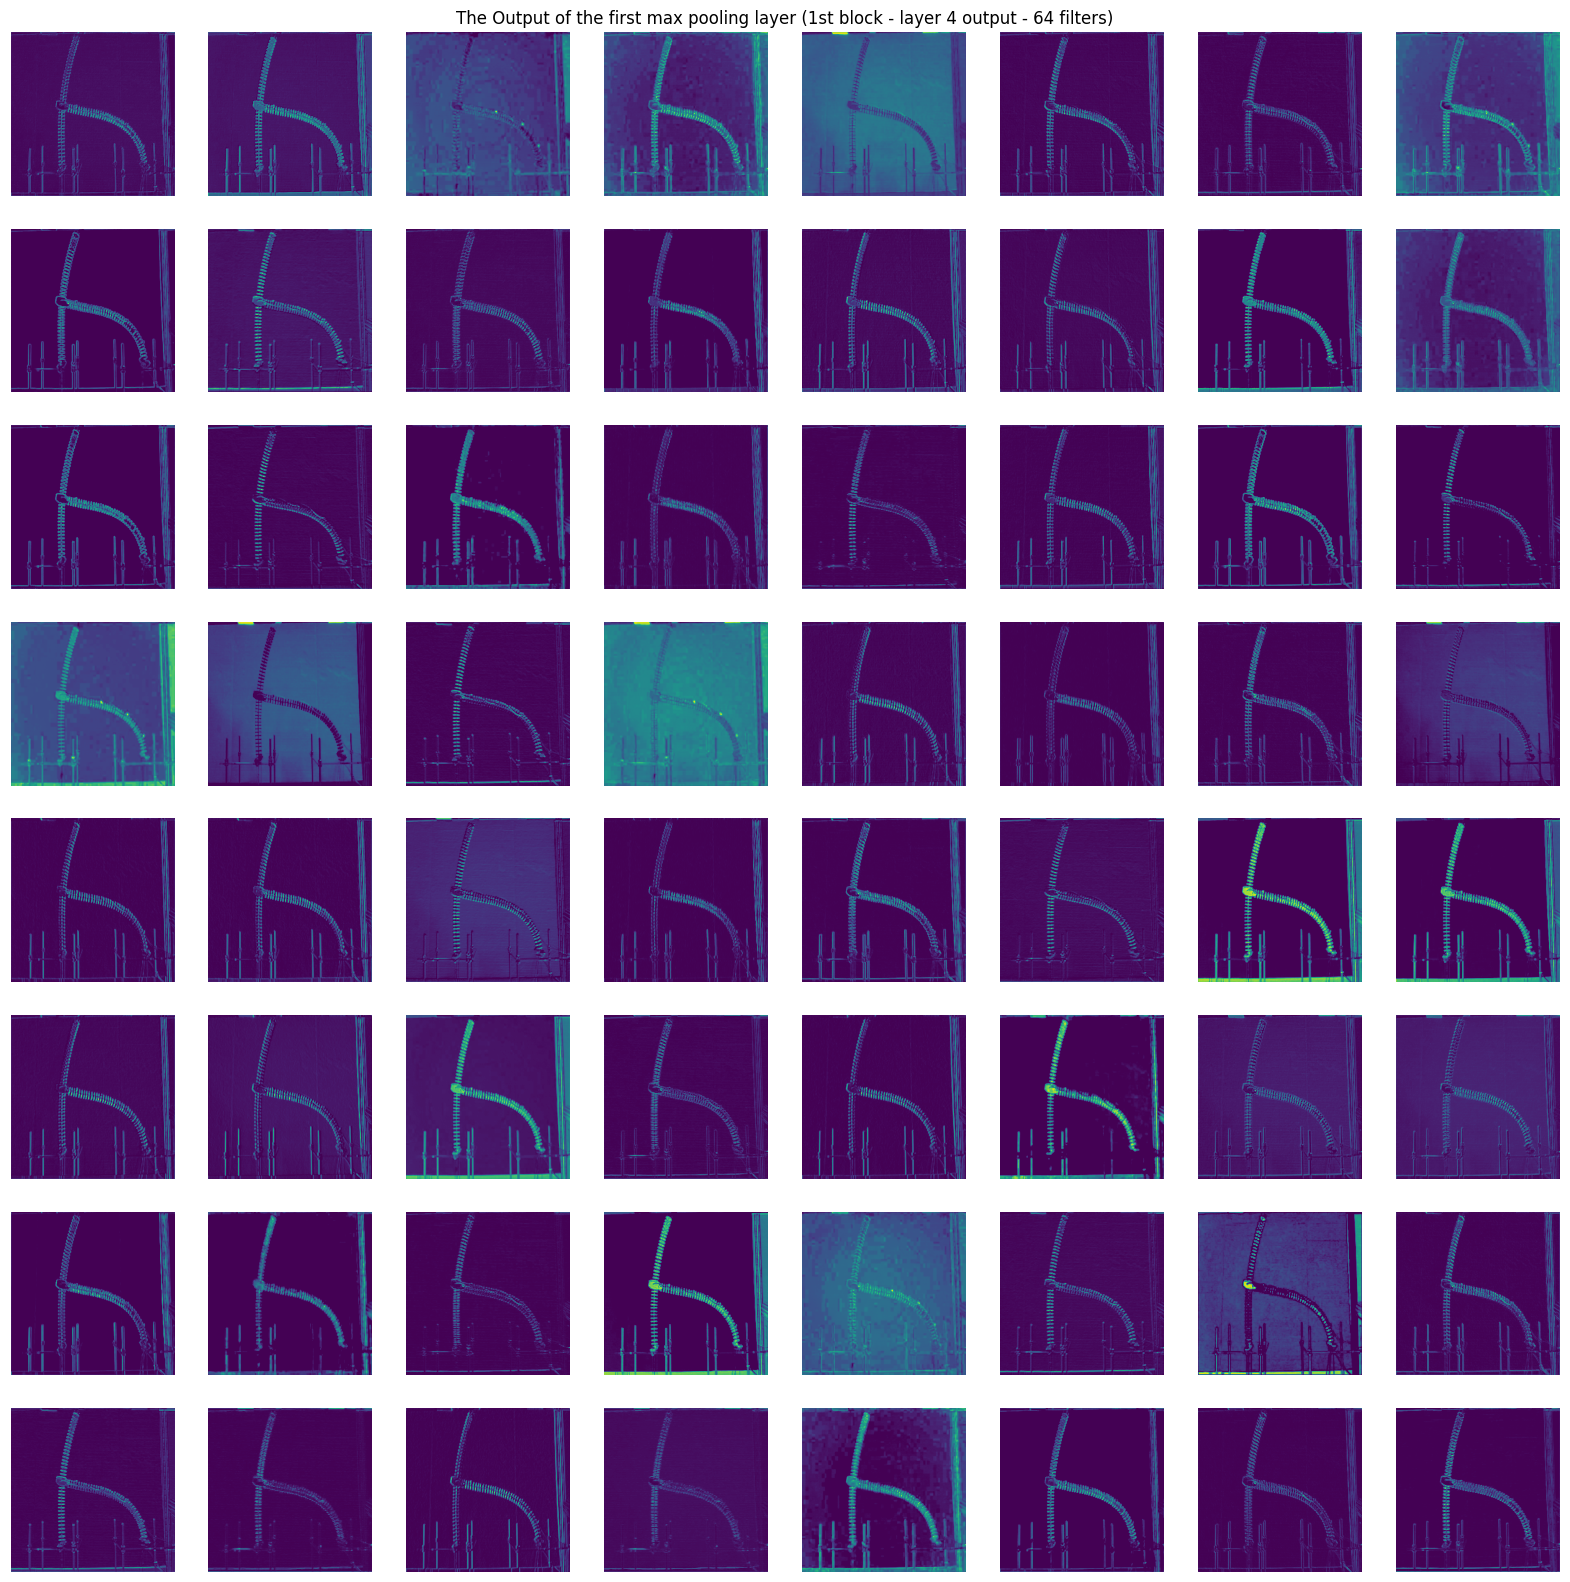

In [7]:

# Visualize the output of the first few filters in the layer
num_filters = 64  # Change this based on the number of filters in the chosen layer
figure = plt.figure(figsize=(20,20))
plt.title('The Output of the first max pooling layer (1st block - layer 4 output - 64 filters)')
plt.axis('off')
for i in range(num_filters):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')  # Display the activation for the first example in the batch
    plt.axis('off')

plt.show()

In [8]:
w = model.layers[2].get_weights()

len(w[0][0][0][0])



64

In [9]:
0# get layer for catch the output
#layer_outputs = [layer.output for layer in model_l.layers[:8]]
activation_model_2 = Model(inputs=model.input, outputs=model.layers[6].output)
print(model.layers[6].name)
print(activations.shape)
#feed the model with the image
activations = activation_model_2.predict(img_array)


block2_pool
(1, 300, 300, 64)
1/1 [==============================] - 0s 142ms/step


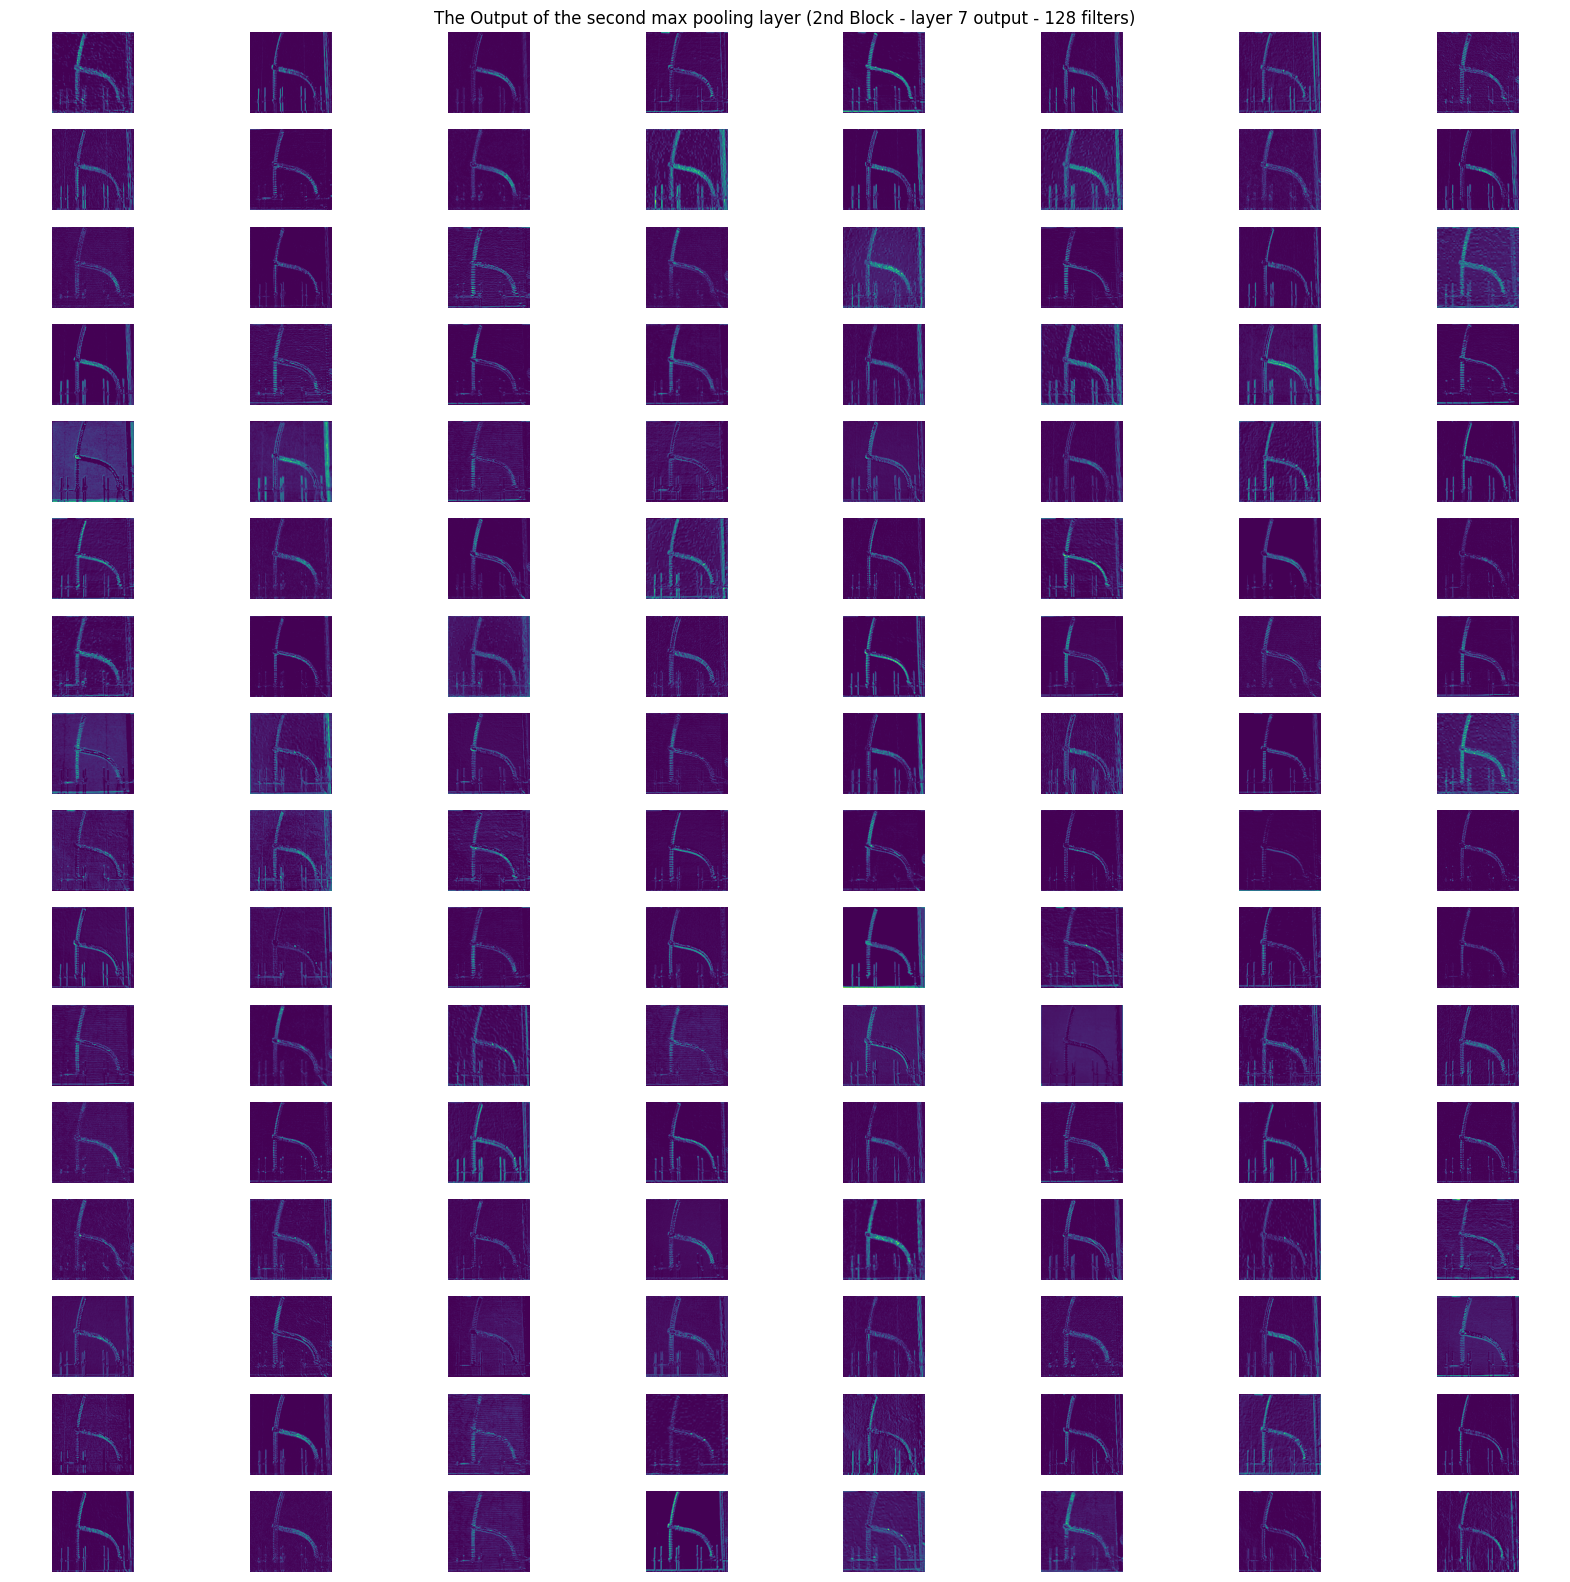

In [10]:

# Visualize the output of the first few filters in the layer
num_filters = 128  # Change this based on the number of filters in the chosen layer
figure = plt.figure(figsize=(20,20))
plt.title('The Output of the second max pooling layer (2nd Block - layer 7 output - 128 filters)')
plt.axis('off')
for i in range(num_filters):
    plt.subplot(16, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')  # Display the activation for the first example in the batch
    plt.axis('off')



plt.show()


In [11]:
# get layer for catch the output
#layer_outputs = [layer.output for layer in model_l.layers[:8]]
activation_model_3 = Model(inputs=model.input, outputs=model.layers[10].output)
print(model.layers[10].name)

#feed the model with the image
activations = activation_model_3.predict(img_array)
print(activations.shape)

block3_pool
1/1 [==============================] - 0s 227ms/step
(1, 75, 75, 256)


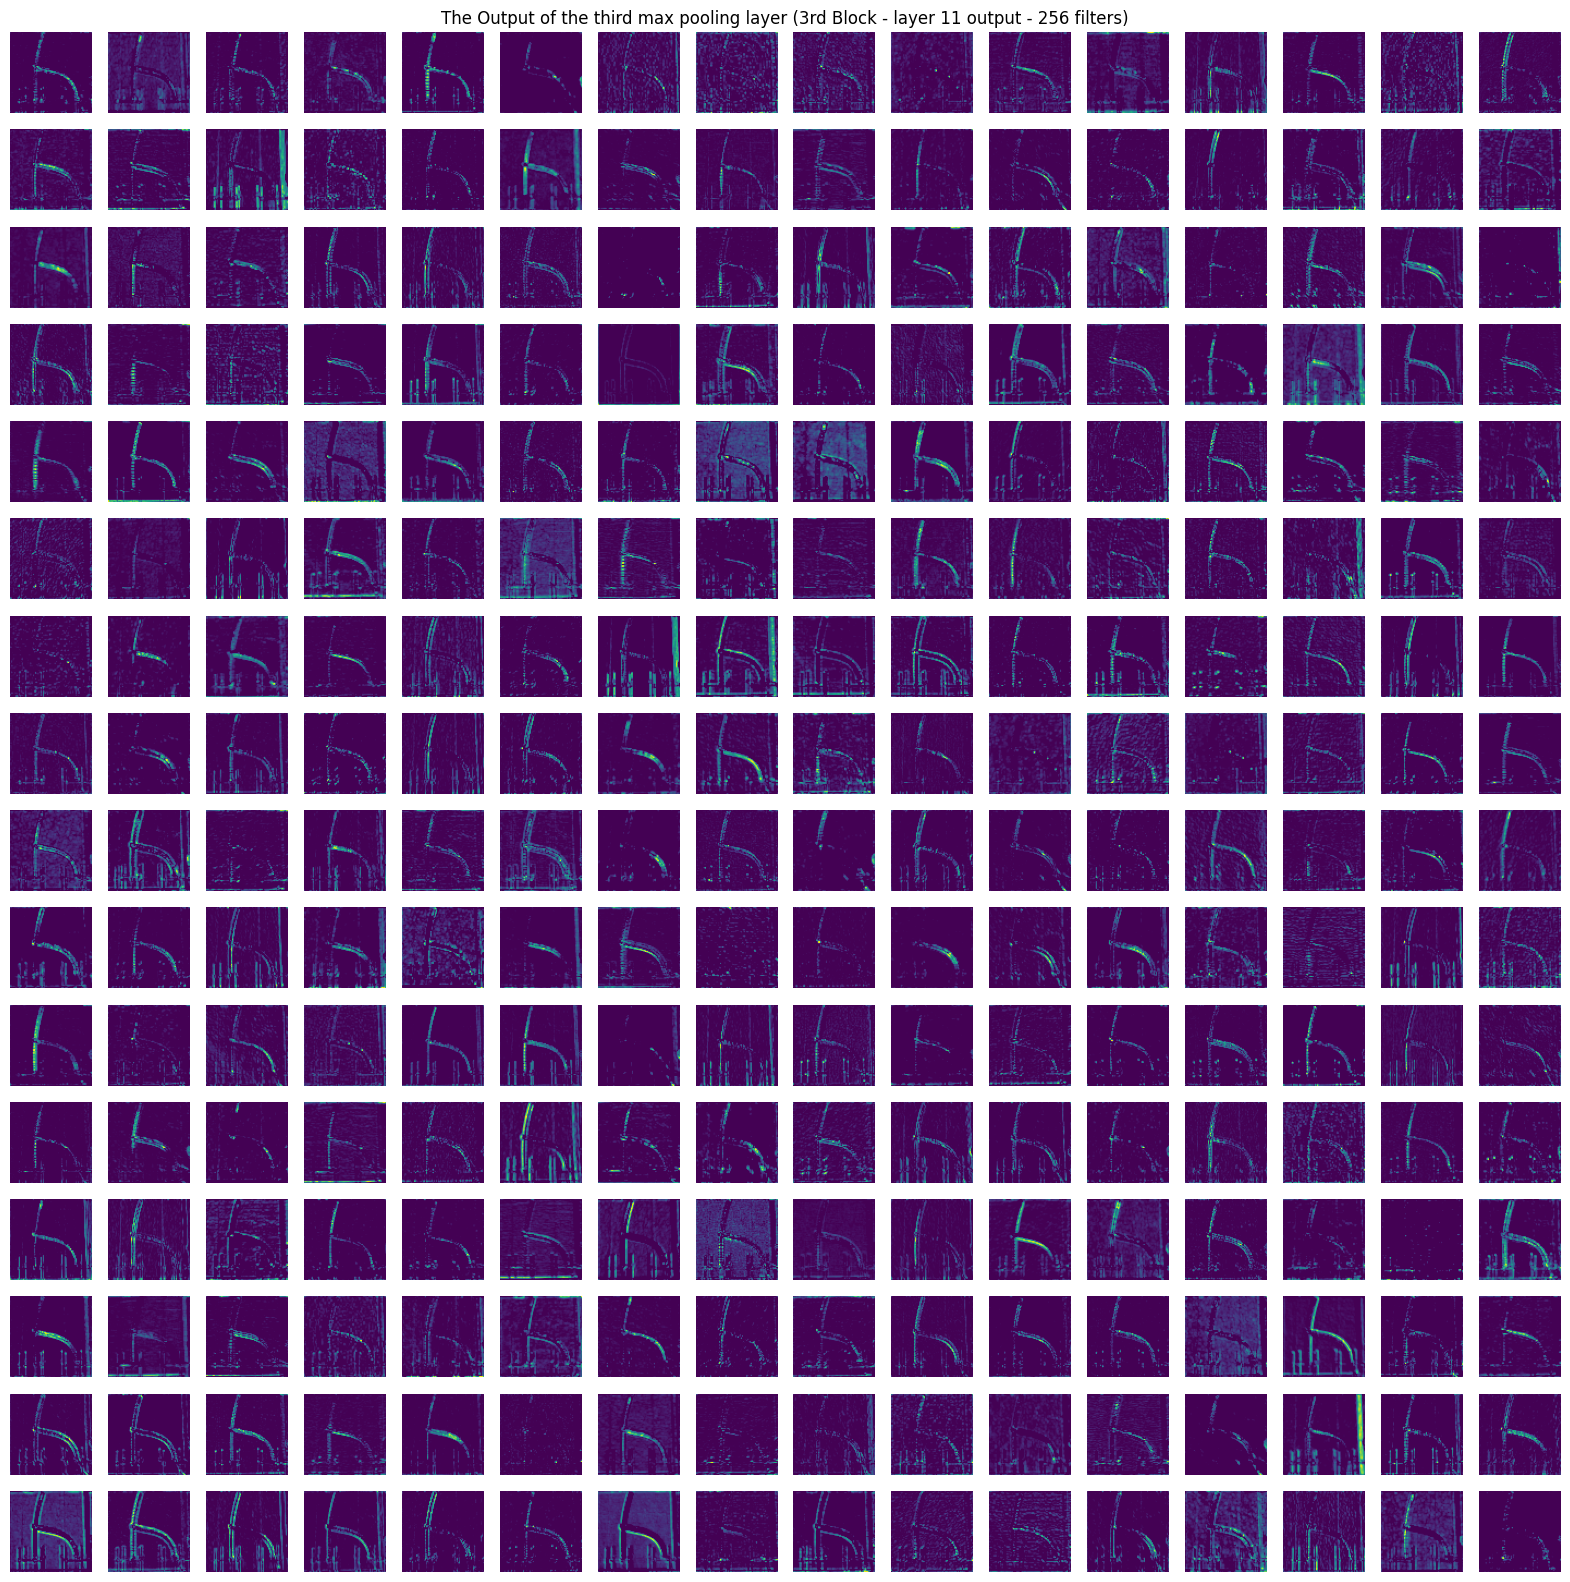

In [12]:

# Visualize the output of the first few filters in the layer
num_filters = 256  # Change this based on the number of filters in the chosen layer
figure = plt.figure(figsize=(20,20))
plt.title('The Output of the third max pooling layer (3rd Block - layer 11 output - 256 filters)')
plt.axis('off')
for i in range(num_filters):
    plt.subplot(16, 16, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')  # Display the activation for the first example in the batch
    plt.axis('off')

plt.show()

In [13]:
# get layer for catch the output
#layer_outputs = [layer.output for layer in model_l.layers[:8]]
activation_model_4 = Model(inputs=model.input, outputs=model.layers[-3].output)
print(model.layers[-3].name)

#feed the model with the image
activations = activation_model_4.predict(img_array)
print(activations.shape)

block4_pool
1/1 [==============================] - 0s 322ms/step
(1, 37, 37, 512)


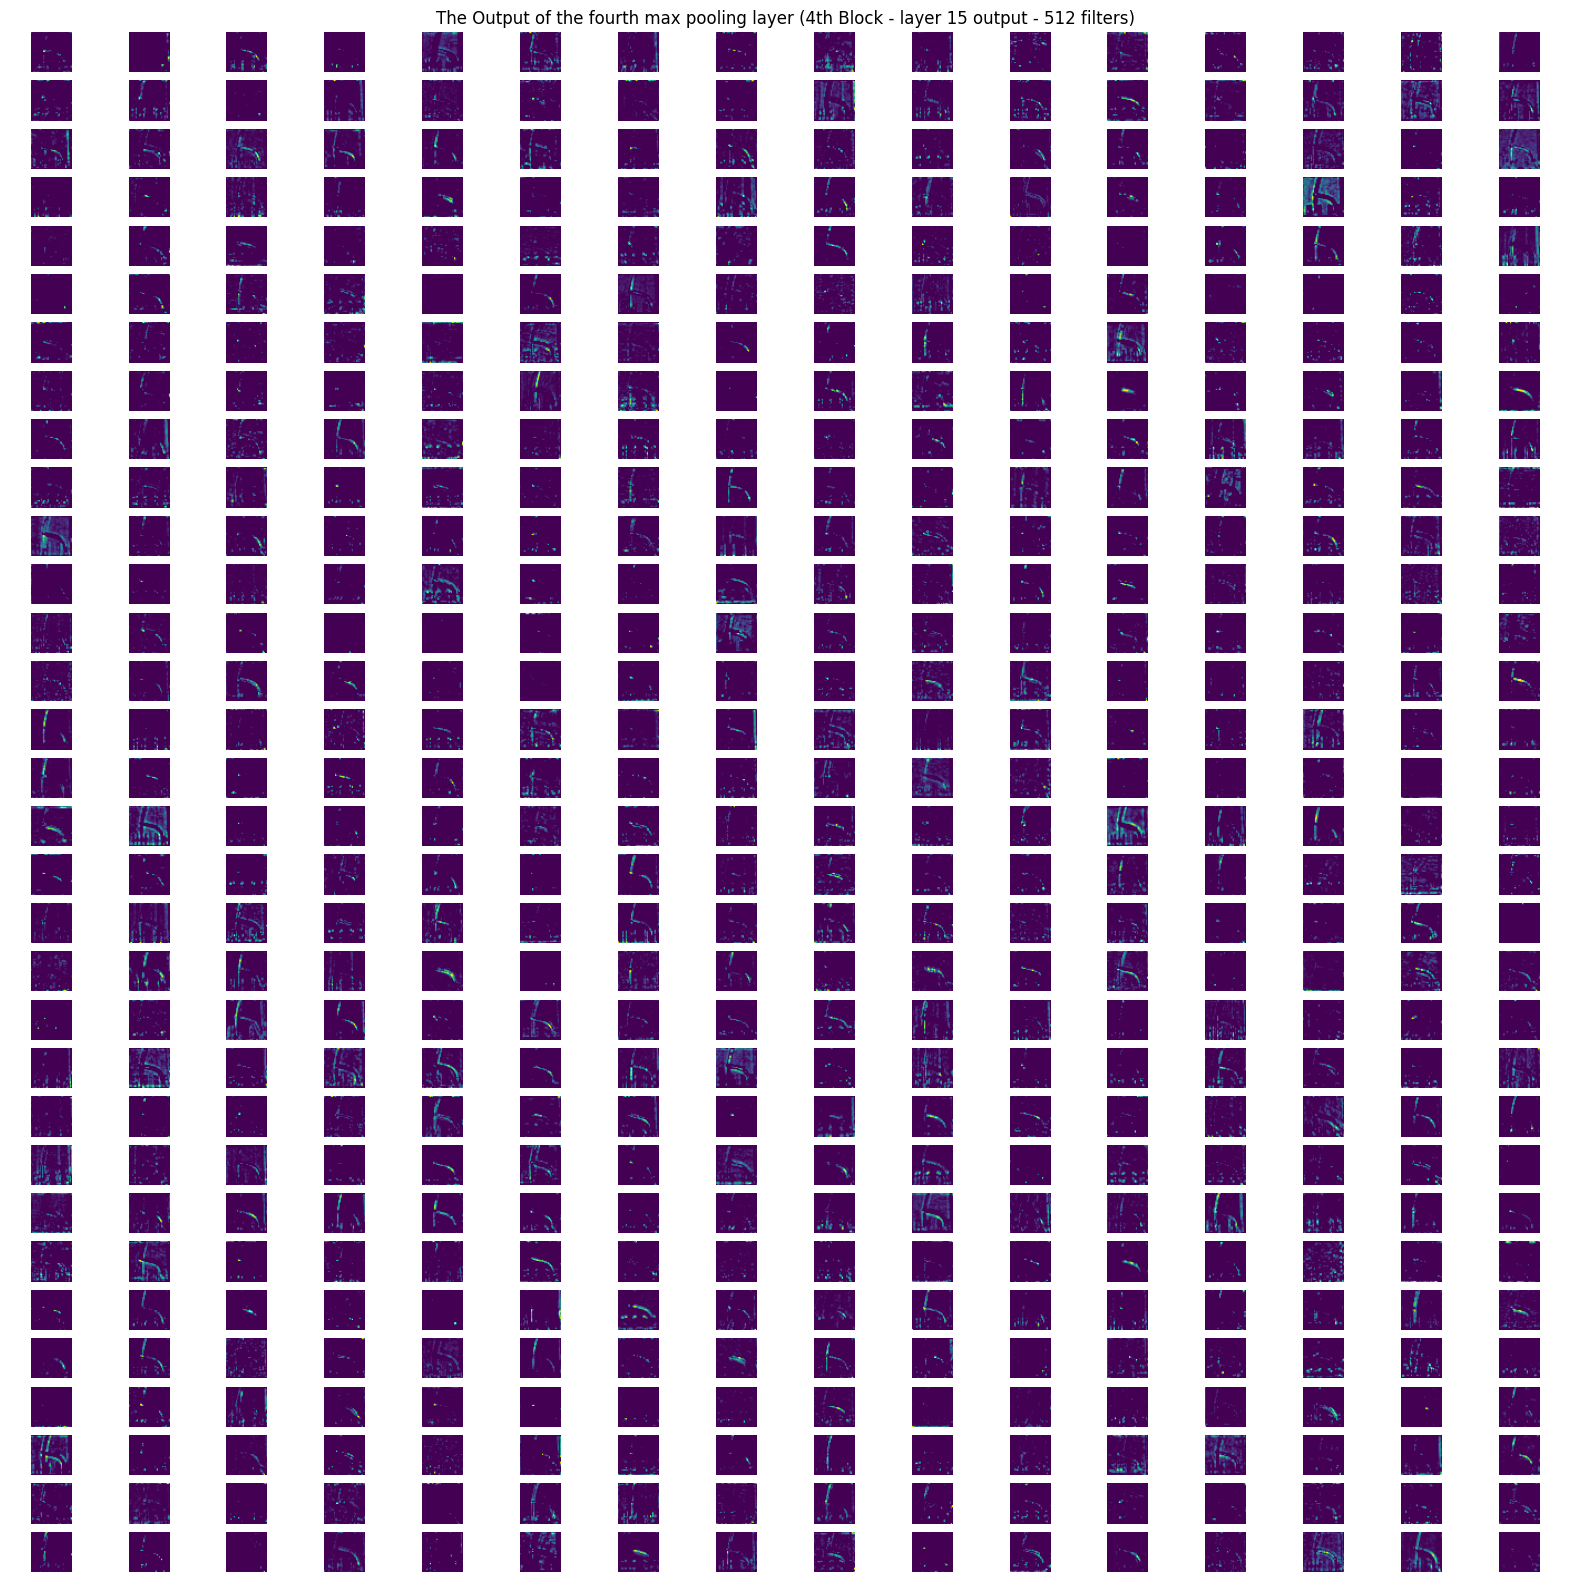

In [14]:
# Visualize the output of the first few filters in the layer
num_filters = 512  # Change this based on the number of filters in the chosen layer
figure = plt.figure(figsize=(20,20))
plt.title('The Output of the fourth max pooling layer (4th Block - layer 15 output - 512 filters)')
plt.axis('off')
for i in range(num_filters):
    plt.subplot(32, 16, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')  # Display the activation for the first example in the batch
    plt.axis('off')

plt.show()